1. Install Required Libraries
Start by installing the necessary libraries for data manipulation, analysis, and quality checks. Some common libraries used for data quality management include:
pandas for data manipulation.
numpy for numerical operations.
matplotlib for data visualization.
openpyxl for working with Excel files (optional, if working with Excel data).

In [1]:
pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


2. Load Data
Use pandas to load your data into a DataFrame. This could be from various data sources such as CSV, Excel, databases, or APIs.

In [5]:
import pandas as pd

# Load data (CSV file as an example)
data = pd.read_csv('sample_data.csv')

# Show the first few rows of the data
print(data.head())

   id           name  age                      email       address
0   1       John Doe   28       john.doe@example.com   123 Main St
1   2     Jane Smith   34      jane.smith@domain.com    456 Elm St
2   3      Tom Brown   22           tom.brown@domain    789 Oak St
3   4    Alice White   22     alice.white@domain.com   101 Pine St
4   5  Charlie Black   30  CHARLIE.BLACK@example.com  202 Maple St


3. Assess Current Data Quality
Perform a quick assessment of the data quality by checking for missing values, duplicates, and outliers.

In [6]:
# Check for missing values
missing_data = data.isnull().sum()

# Check for duplicate rows
duplicate_data = data.duplicated().sum()

# Basic descriptive statistics to identify outliers
data_description = data.describe()

print("Missing Data:", missing_data)
print("Duplicate Rows:", duplicate_data)
print("Data Description:\n", data_description)

Missing Data: id         0
name       0
age        0
email      0
address    0
dtype: int64
Duplicate Rows: 0
Data Description:
              id        age
count  10.00000  10.000000
mean    5.50000  28.800000
std     3.02765   5.940445
min     1.00000  22.000000
25%     3.25000  25.000000
50%     5.50000  27.500000
75%     7.75000  33.000000
max    10.00000  40.000000


4. Data Cleansing
Once the issues are identified, you can cleanse the data by handling missing values, removing duplicates, and correcting inconsistent data.

Handling Missing Values
You can either fill missing values with a specific value (mean, median, mode) or drop rows/columns with missing values.

In [7]:
# Fill missing values with mean (for numerical columns)
data.fillna(data.mean(), inplace=True)

# Drop rows with missing values
# data.dropna(inplace=True)

# Alternatively, you can fill missing values with a placeholder for categorical data
# data['column_name'].fillna('Unknown', inplace=True)


TypeError: Could not convert ['John DoeJane SmithTom BrownAlice WhiteCharlie BlackDavid GreenEmily BlueGeorge GrayHenry GoldIrene Silver'
 'john.doe@example.comjane.smith@domain.comtom.brown@domainalice.white@domain.comCHARLIE.BLACK@example.comdavid.green@domain.comemily.blue@domain.comgeorge.gray@domainhenry.gold@domain.comirene.silver@domain.com'
 '123 Main St456 Elm St789 Oak St101 Pine St202 Maple St303 Birch St404 Cedar St505 Birch St606 Pine St707 Oak St'] to numeric

Removing Duplicates
Remove duplicate rows in your dataset.

In [8]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

Data Transformation
Standardize and normalize data if needed, such as converting strings to lowercase or removing special characters.

In [11]:
# Convert all string data in a column to lowercase
data['name'] = data['name'].str.lower()

# Strip leading/trailing whitespaces from string columns
data['email'] = data['email'].str.strip()

data['address'] = data['address'].str.strip()

5. Data Validation
Ensure that the data conforms to predefined rules, such as checking for valid ranges, formats, or values.

In [12]:
# Example: Ensure 'age' column contains values within a valid range (18 to 100)
data = data[(data['age'] >= 18) & (data['age'] <= 100)]

# Example: Check that 'email' column contains valid email addresses
import re

def is_valid_email(email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return bool(re.match(pattern, email))

data = data[data['email'].apply(is_valid_email)]

6. Data Quality Monitoring (Automated Checks)
Set up periodic checks to monitor the data quality. You can use scheduled tasks (like cron jobs) or set up a Python script to run data quality checks on a regular basis.

In [13]:
# Define functions for periodic checks
def data_quality_check(df):
    # Example check: Ensure no missing values
    if df.isnull().sum().sum() > 0:
        print("Data Quality Issue: Missing values found.")
    else:
        print("Data Quality Check Passed: No missing values.")
    
    # Example check: Ensure no duplicates
    if df.duplicated().sum() > 0:
        print("Data Quality Issue: Duplicate rows found.")
    else:
        print("Data Quality Check Passed: No duplicate rows.")

# Run the check
data_quality_check(data)


Data Quality Check Passed: No missing values.
Data Quality Check Passed: No duplicate rows.


7. Visualize Data Quality
You can use visualizations to understand data quality metrics better, such as the distribution of missing values, duplicates, etc.

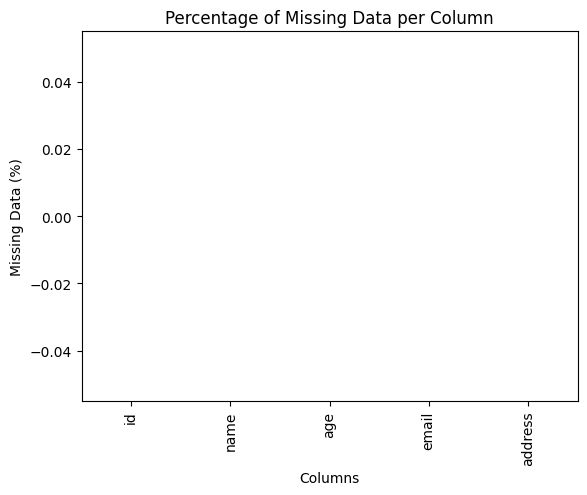

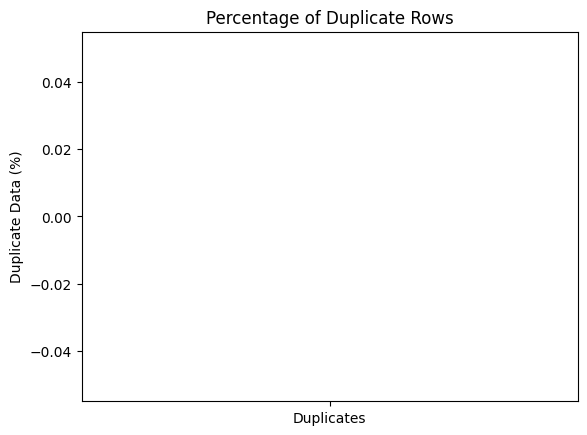

In [14]:
import matplotlib.pyplot as plt

# Visualizing missing data
missing_data_percentage = data.isnull().mean() * 100
missing_data_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Data per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Data (%)')
plt.show()

# Visualizing duplicates
duplicate_percentage = (data.duplicated().mean() * 100)
plt.bar(['Duplicates'], [duplicate_percentage], color='salmon')
plt.title('Percentage of Duplicate Rows')
plt.ylabel('Duplicate Data (%)')
plt.show()

8. Create Data Quality Reports
You can generate automated reports that summarize the quality checks, including issues found and steps taken to fix them.

In [15]:
def generate_report(data):
    report = {
        'Missing Data': data.isnull().sum(),
        'Duplicate Rows': data.duplicated().sum(),
        'Data Description': data.describe(),
    }
    return report

# Generate a summary report
report = generate_report(data)
print(report)

{'Missing Data': id         0
name       0
age        0
email      0
address    0
dtype: int64, 'Duplicate Rows': np.int64(0), 'Data Description':               id        age
count   8.000000   8.000000
mean    5.500000  28.250000
std     3.162278   4.527693
min     1.000000  22.000000
25%     3.500000  25.000000
50%     5.500000  27.500000
75%     7.500000  31.000000
max    10.000000  35.000000}


9. Store Clean Data
After cleansing and validation, save the cleaned dataset for further use or analysis.

In [16]:
# Save the cleaned data to a new CSV file
data.to_csv('cleaned_data.csv', index=False)

10. Automate DQM with Python Scripts
You can automate this whole process using Python scripts that run periodically (e.g., using cron jobs on Linux or Task Scheduler on Windows) to check and clean your data.